<a href="https://colab.research.google.com/github/ewertonsilvag/Projeto_Conclusao_SoulCode/blob/main/DataFrame_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Conexão com o Google Cloud Storage**




In [ ]:
#Importação de biblioteca para autenticar conexão com GCP e criação de variáveis
from google.colab import auth

project_id = 'projeto-grupo2-economia'
bucket_name = 'economia-dados-g2'

auth.authenticate_user()

In [ ]:
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
#Enviando os dados brutos para o Bucket

#!gsutil cp /content/drive/MyDrive/Economia/bitcoin.json gs://{bucket_name}/entrada/

Copying file:///content/drive/MyDrive/Economia/bitcoin.json [Content-Type=application/json]...
/ [1 files][986.6 KiB/986.6 KiB]                                                
Operation completed over 1 objects/986.6 KiB.                                    


In [ ]:
#Download dos dados parea área de trabalho local 
!gsutil cp gs://{bucket_name}/entrada/bitcoin.json /content/

Copying gs://economia-dados-g2/entrada/bitcoin.json...
/ [1 files][986.6 KiB/986.6 KiB]                                                
Operation completed over 1 objects/986.6 KiB.                                    


# **Pandas**

## Importação de bibliotecas

In [ ]:
import pandas as pd

In [ ]:
#Abrindo o arquivo json
df = pd.read_json("/content/bitcoin.json")
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


## Limpeza e Tratamento de Dados

In [ ]:
df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [ ]:
#Tradução dos nomes de colunas para o português
#Comentário - 01

df.rename(columns={
    'SNo':'Id',
    'Symbol':'Sigla',
    'Date':'Data',
    'Name':'Moeda',
    'Open':'Preco_Abertura',
    'Close':'Preco_Fechamento',
    'Low':'Menor_Preco',
    'High':'Maior_Preco',
    'Volume':'Volume',
    'Marketcap':'Capitalizacao_Mercado'
}, inplace=True)

In [ ]:
#Verificação de "Null"
df.isnull().sum()

Id                       0
Moeda                    0
Sigla                    0
Data                     0
Maior_Preco              0
Menor_Preco              0
Preco_Abertura           0
Preco_Fechamento         0
Volume                   0
Capitalizacao_Mercado    0
dtype: int64

In [ ]:
#Verificação de "Na"
df.isna().sum()

Id                       0
Moeda                    0
Sigla                    0
Data                     0
Maior_Preco              0
Menor_Preco              0
Preco_Abertura           0
Preco_Fechamento         0
Volume                   0
Capitalizacao_Mercado    0
dtype: int64

In [ ]:
#Retirando as horas, normalizando a data 

df['Data'] = pd.to_datetime(df['Data']).dt.normalize()

In [ ]:
#Formatar Float para exibir apenas duas casa depois da vírgula
#Comentário -02

pd.options.display.float_format = '{:,.2f}'.format
df

,Id,Moeda,Sigla,Data,Maior_Preco,Menor_Preco,Preco_Abertura,Preco_Fechamento,Volume,Capitalizacao_Mercado
0,1,Bitcoin,BTC,2013-04-29,147.49,134.00,134.44,144.54,0.00,"1,603,768,864.50"
1,2,Bitcoin,BTC,2013-04-30,146.93,134.05,144.00,139.00,0.00,"1,542,813,125.00"
2,3,Bitcoin,BTC,2013-05-01,139.89,107.72,139.00,116.99,0.00,"1,298,954,593.75"
3,4,Bitcoin,BTC,2013-05-02,125.60,92.28,116.38,105.21,0.00,"1,168,517,495.25"
4,5,Bitcoin,BTC,2013-05-03,108.13,79.10,106.25,97.75,0.00,"1,085,995,168.75"
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,"33,939.59","32,770.68","33,549.60","33,897.05","38,728,974,942.25","635,450,784,106.09"
2987,2988,Bitcoin,BTC,2021-07-03,"34,909.26","33,402.70","33,854.42","34,668.55","24,383,958,643.26","649,939,701,346.23"
2988,2989,Bitcoin,BTC,2021-07-04,"35,937.57","34,396.48","34,665.56","35,287.78","24,924,307,911.11","661,574,836,314.86"
2989,2990,Bitcoin,BTC,2021-07-05,"35,284.34","33,213.66","35,284.34","33,746.00","26,721,554,282.07","632,696,207,199.70"


In [ ]:
df.dtypes

Id                                int64
Moeda                            object
Sigla                            object
Data                     datetime64[ns]
Maior_Preco                     float64
Menor_Preco                     float64
Preco_Abertura                  float64
Preco_Fechamento                float64
Volume                          float64
Capitalizacao_Mercado           float64
dtype: object

##Plotagem

### Criando minidataframe para plotagem 1 (Preço Fechamento mar de 2018)

In [ ]:
colunas_plotagem1 = ['Data','Preco_Fechamento']

In [ ]:
df2=df.filter(items=colunas_plotagem1)

In [ ]:
df3 = df2.query("Data >= '2018-03-01' & Data <= '2018-03-31'")

### Criando minidataframe para plotagem 2 (Preço Fechamento mar de 2019)

In [ ]:
colunas_plotagem2 = ['Data','Preco_Fechamento']

In [ ]:
df4=df.filter(items=colunas_plotagem2)

In [ ]:
df5 = df4.query("Data >= '2019-03-01' & Data <= '2019-03-31'")

### CriandoMinidataframe para plotagem 3 (Preco_Fechamento mar 2020)




In [ ]:
colunas_plotagem3 = ['Data','Preco_Fechamento']

In [ ]:
df6=df.filter(items=colunas_plotagem3)

In [ ]:
df7 = df2.query("Data >= '2020-03-01' & Data <= '2020-03-31'")

### CriandoMinidataframe para plotagem 4(Preco_Fechamento mar 2021)

In [ ]:
colunas_plotagem4 = ['Data','Preco_Fechamento']

In [ ]:
df8=df.filter(items=colunas_plotagem4)

In [ ]:
df9 = df2.query("Data >= '2021-03-01' & Data <= '2021-03-31'")

###Plotagens

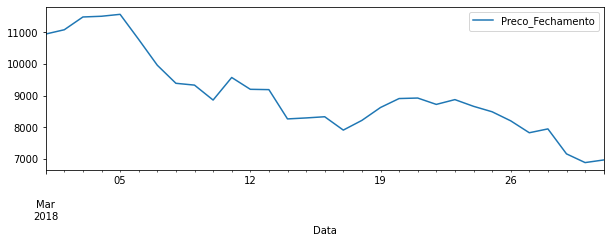

In [ ]:
#Preço de Fechamento do bitcoin no mês de março de 2018
df3.plot(x='Data',y='Preco_Fechamento',kind='line',figsize=(10, 3))

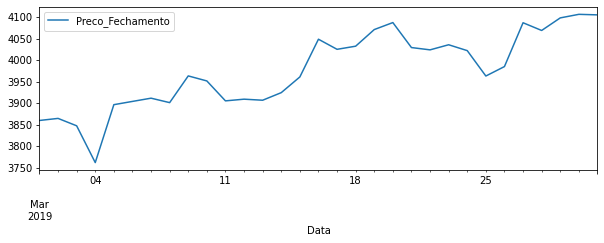

In [ ]:
#Preço de Fechamento do bitcoin no mês de março de 2019
df5.plot(x='Data',y='Preco_Fechamento',kind='line',figsize=(10, 3))

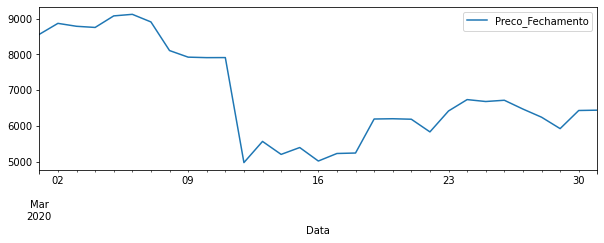

In [ ]:
#Preço de Fechamento do bitcoin no mês de março de 2019
df7.plot(x='Data',y='Preco_Fechamento',kind='line',figsize=(10, 3))

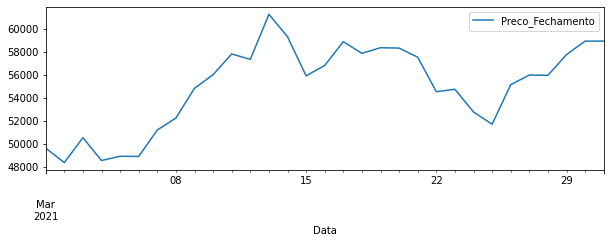

In [ ]:
#Preço de Fechamento do bitcoin no mês de março de 2019
df9.plot(x='Data',y='Preco_Fechamento',kind='line',figsize=(10, 3))

## Load para Bucket GCP 

In [ ]:
#Transformando os dados em csv para facilitar tratamento dos dados
#Comwentário - 03

df.to_csv("/content/bitcoin_pandas.csv", index=False)

In [ ]:
#Enviando tabela em csv para a cloud
!gsutil cp /content/bitcoin_pandas.csv gs://{bucket_name}/saida/dados_pandas/

Copying file:///content/bitcoin_pandas.csv [Content-Type=text/csv]...
/ [1 files][347.1 KiB/347.1 KiB]                                                
Operation completed over 1 objects/347.1 KiB.                                    


# **pySpark**

In [ ]:
#Download da tabela normalizada com Pandas
!gsutil cp gs://{bucket_name}/saida/dados_pandas/bitcoin_pandas.csv /content/dados_pyspark/bitcoin_pandas.csv

Copying gs://economia-dados-g2/saida/dados_pandas/bitcoin_pandas.csv...
/ [1 files][347.1 KiB/347.1 KiB]                                                
Operation completed over 1 objects/347.1 KiB.                                    


## Instalação de pySpark e importação de bibliotecas

In [ ]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 35 kB/s 
     |████████████████████████████████| 198 kB 49.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=71ad8b5af803eafeaeec353255e926b5709f42e36ba0099be75b05ae95249b3d
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, DateType, DoubleType
import datetime

In [ ]:
#Configuração do SparkSession
#Comentário - 05

spark = (
    SparkSession.builder
    .master("local")
    .appName("bitcoin")
    .config("spark.ui.port", "5040")
    .getOrCreate()
)

In [ ]:
spark

## Verificação do Dataframe

In [ ]:
#Personalização da Schema e importação do DataFrame
#Comentário - 06

customSchema = StructType([
  StructField("Id", IntegerType(), True),                      
  StructField("Moeda", StringType(), True),
  StructField("Sigla", StringType(), True),
  StructField("Data", DateType(), True),
  StructField("Maior_Preco", DoubleType(), True),
  StructField("Menor_Preco", DoubleType(), True),
  StructField("Preco_Abertura", DoubleType(), True),
  StructField("Preco_Fechamento", DoubleType(), True),
  StructField("Volume", DoubleType(), True),
  StructField("Capitalizacao_Mercado", DoubleType(), True)
])

df = spark.read.load("/content/dados_pyspark/bitcoin_pandas.csv", format="csv", header=True, schema=customSchema)

df.show(5)
df.dtypes

+---+-------+-----+----------+------------------+------------------+------------------+------------------+------+---------------------+
| Id|  Moeda|Sigla|      Data|       Maior_Preco|       Menor_Preco|    Preco_Abertura|  Preco_Fechamento|Volume|Capitalizacao_Mercado|
+---+-------+-----+----------+------------------+------------------+------------------+------------------+------+---------------------+
|  1|Bitcoin|  BTC|2013-04-29|147.48800659179688|             134.0|134.44400024414062| 144.5399932861328|   0.0|       1.6037688645E9|
|  2|Bitcoin|  BTC|2013-04-30|146.92999267578125| 134.0500030517578|             144.0|             139.0|   0.0|        1.542813125E9|
|  3|Bitcoin|  BTC|2013-05-01|139.88999938964844|107.72000122070312|             139.0|116.98999786376953|   0.0|      1.29895459375E9|
|  4|Bitcoin|  BTC|2013-05-02| 125.5999984741211| 92.28189849853516|116.37999725341797|105.20999908447266|   0.0|      1.16851749525E9|
|  5|Bitcoin|  BTC|2013-05-03|108.12799835205078

[('Id', 'int'),
 ('Moeda', 'string'),
 ('Sigla', 'string'),
 ('Data', 'date'),
 ('Maior_Preco', 'double'),
 ('Menor_Preco', 'double'),
 ('Preco_Abertura', 'double'),
 ('Preco_Fechamento', 'double'),
 ('Volume', 'double'),
 ('Capitalizacao_Mercado', 'double')]

In [ ]:
#Verificação das colunas
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Moeda: string (nullable = true)
 |-- Sigla: string (nullable = true)
 |-- Data: date (nullable = true)
 |-- Maior_Preco: double (nullable = true)
 |-- Menor_Preco: double (nullable = true)
 |-- Preco_Abertura: double (nullable = true)
 |-- Preco_Fechamento: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Capitalizacao_Mercado: double (nullable = true)



## Criação de colunas

In [ ]:
df = df.withColumn("Valorizou_No_Dia", F.when(F.col("Preco_Fechamento") > F.col("Preco_Abertura"), \
                                              F.lit("SIM")).otherwise("NAO"))

df.show(10)

+---+-------+-----+----------+------------------+------------------+------------------+------------------+------+---------------------+----------------+
| Id|  Moeda|Sigla|      Data|       Maior_Preco|       Menor_Preco|    Preco_Abertura|  Preco_Fechamento|Volume|Capitalizacao_Mercado|Valorizou_No_Dia|
+---+-------+-----+----------+------------------+------------------+------------------+------------------+------+---------------------+----------------+
|  1|Bitcoin|  BTC|2013-04-29|147.48800659179688|             134.0|134.44400024414062| 144.5399932861328|   0.0|       1.6037688645E9|             SIM|
|  2|Bitcoin|  BTC|2013-04-30|146.92999267578125| 134.0500030517578|             144.0|             139.0|   0.0|        1.542813125E9|             NAO|
|  3|Bitcoin|  BTC|2013-05-01|139.88999938964844|107.72000122070312|             139.0|116.98999786376953|   0.0|      1.29895459375E9|             NAO|
|  4|Bitcoin|  BTC|2013-05-02| 125.5999984741211| 92.28189849853516|116.3799972534

In [ ]:
df = df.withColumn("Variacao_Preco", F.col("Preco_Fechamento")-F.col("Preco_Abertura"))

df.show(5)

+---+-------+-----+----------+------------------+------------------+------------------+------------------+------+---------------------+----------------+-------------------+
| Id|  Moeda|Sigla|      Data|       Maior_Preco|       Menor_Preco|    Preco_Abertura|  Preco_Fechamento|Volume|Capitalizacao_Mercado|Valorizou_No_Dia|     Variacao_Preco|
+---+-------+-----+----------+------------------+------------------+------------------+------------------+------+---------------------+----------------+-------------------+
|  1|Bitcoin|  BTC|2013-04-29|147.48800659179688|             134.0|134.44400024414062| 144.5399932861328|   0.0|       1.6037688645E9|             SIM| 10.095993041992188|
|  2|Bitcoin|  BTC|2013-04-30|146.92999267578125| 134.0500030517578|             144.0|             139.0|   0.0|        1.542813125E9|             NAO|               -5.0|
|  3|Bitcoin|  BTC|2013-05-01|139.88999938964844|107.72000122070312|             139.0|116.98999786376953|   0.0|      1.29895459375E9|

In [ ]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Moeda: string (nullable = true)
 |-- Sigla: string (nullable = true)
 |-- Data: date (nullable = true)
 |-- Maior_Preco: double (nullable = true)
 |-- Menor_Preco: double (nullable = true)
 |-- Preco_Abertura: double (nullable = true)
 |-- Preco_Fechamento: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Capitalizacao_Mercado: double (nullable = true)
 |-- Valorizou_No_Dia: string (nullable = false)
 |-- Variacao_Preco: double (nullable = true)



## Consultas para insights

In [ ]:
#Verificando o maior preço registrado
df.select(F.max("Maior_Preco").alias("Maior_Preco_Registrado")).show()

+----------------------+
|Maior_Preco_Registrado|
+----------------------+
|         64863.0989077|
+----------------------+



In [ ]:
#Verificando o menor preço registrado
df.select(F.col("Data"), F.col("Menor_Preco")).orderBy("Menor_Preco").show(1)

+----------+----------------+
|      Data|     Menor_Preco|
+----------+----------------+
|2013-07-05|65.5260009765625|
+----------+----------------+
only showing top 1 row



In [ ]:
#Verificando o menor preço registrado
df.select(F.col("Data"), F.col("Maior_Preco")).orderBy("Maior_Preco").show(1)

+----------+-----------------+
|      Data|      Maior_Preco|
+----------+-----------------+
|2013-07-07|74.56109619140625|
+----------+-----------------+
only showing top 1 row



In [ ]:
#Informações sobrw a variação de preços, começando pelas maiores variações negativas
df.select(F.col("Data"), F.col("Preco_Abertura"), F.col("Preco_Fechamento"), \
          F.col("Variacao_Preco")).orderBy("Variacao_Preco").show(10)

+----------+--------------+----------------+-------------------+
|      Data|Preco_Abertura|Preco_Fechamento|     Variacao_Preco|
+----------+--------------+----------------+-------------------+
|2021-05-12|56714.53316738|  49150.53387514| -7563.999292240005|
|2021-05-19|42944.97544731|   37002.4404659| -5942.534981409997|
|2021-02-23|54204.92975578|  48824.42686909| -5380.502886690003|
|2021-01-21|35549.39740902|  30825.69850603|     -4723.69890299|
|2021-04-18|60701.88609331|  56216.18500243|     -4485.70109088|
|2021-06-21|35641.14606474|  31676.69373254|-3964.4523322000023|
|2021-05-04|57214.17876121|  53333.53775274|-3880.6410084700037|
|2021-03-15| 59267.4290492|  55907.20022619| -3360.228823010002|
|2021-02-22|57532.73886407|  54207.31906543| -3325.419798640003|
|2021-05-21|40596.94832252|  37304.69067136|-3292.2576511600055|
+----------+--------------+----------------+-------------------+
only showing top 10 rows



In [ ]:
#Informações importantes sobre a moeda em dias que terminou valorizada
df.select(F.col("Data"), F.col("Sigla"), F.col("Preco_Abertura"), F.col("Preco_Fechamento"), \
          F.col("Variacao_Preco"),F.col("Valorizou_No_Dia")).filter(F.col("Valorizou_No_Dia") \
          == "SIM").show()

+----------+-----+------------------+------------------+------------------+----------------+
|      Data|Sigla|    Preco_Abertura|  Preco_Fechamento|    Variacao_Preco|Valorizou_No_Dia|
+----------+-----+------------------+------------------+------------------+----------------+
|2013-04-29|  BTC|134.44400024414062| 144.5399932861328|10.095993041992188|             SIM|
|2013-05-04|  BTC|  98.0999984741211|             112.5|14.400001525878906|             SIM|
|2013-05-05|  BTC| 112.9000015258789|115.91000366210938|3.0100021362304688|             SIM|
|2013-05-08|  BTC| 109.5999984741211|113.56600189208984|  3.96600341796875|             SIM|
|2013-05-10|  BTC|112.79900360107422|117.19999694824219| 4.400993347167969|             SIM|
|2013-05-13|  BTC|114.81999969482422| 117.9800033569336| 3.160003662109375|             SIM|
|2013-05-15|  BTC| 111.4000015258789|114.22000122070312|2.8199996948242188|             SIM|
|2013-05-16|  BTC|114.22000122070312|118.76000213623047| 4.54000091552

In [ ]:
#Informações importantes sobre a moeda em dias que terminou desvalorizada
df.select(F.col("Data"), F.col("Sigla"), F.col("Preco_Abertura"),\
          F.col("Preco_Fechamento"), F.col("Variacao_Preco"), F.col("Valorizou_No_Dia"))\
          .filter(F.col("Valorizou_No_Dia") == "NAO").show(10)

+----------+-----+------------------+------------------+-------------------+----------------+
|      Data|Sigla|    Preco_Abertura|  Preco_Fechamento|     Variacao_Preco|Valorizou_No_Dia|
+----------+-----+------------------+------------------+-------------------+----------------+
|2013-04-30|  BTC|             144.0|             139.0|               -5.0|             NAO|
|2013-05-01|  BTC|             139.0|116.98999786376953| -22.01000213623047|             NAO|
|2013-05-02|  BTC|116.37999725341797|105.20999908447266|-11.169998168945312|             NAO|
|2013-05-03|  BTC|            106.25|             97.75|               -8.5|             NAO|
|2013-05-06|  BTC| 115.9800033569336|112.30000305175781|-3.6800003051757812|             NAO|
|2013-05-07|  BTC|            112.25|             111.5|              -0.75|             NAO|
|2013-05-09|  BTC|113.19999694824219|112.66999816894531| -0.529998779296875|             NAO|
|2013-05-11|  BTC|117.69999694824219|115.24299621582031| -2.

In [ ]:
#Backup
bitcoin_df = df

##  Load para Bucket GCP 

In [ ]:
# convertendo Spark_df para Pandas_df
bitcoin_df_pd = df.toPandas()

In [ ]:
#salvando Spark to Pandas no drive
bitcoin_df_pd.to_csv("/content/dados_pyspark/bitcoin_pyspark.csv", index = False)

In [ ]:
#Envio de dados para o bucket
!gsutil cp /content/dados_pyspark/bitcoin_pyspark.csv gs://{bucket_name}/saida/dados_pyspark/

Copying file:///content/dados_pyspark/bitcoin_pyspark.csv [Content-Type=text/csv]...
/ [1 files][409.8 KiB/409.8 KiB]                                                
Operation completed over 1 objects/409.8 KiB.                                    


# **SparkSQL**

In [ ]:
#Download de arquivos do bucket  
!gsutil cp gs://{bucket_name}/saida/dados_pyspark/bitcoin_pyspark.csv  /content/dados_sparksql/bitcoin_spark_sql.csv 

Copying gs://economia-dados-g2/saida/dados_pyspark/bitcoin_pyspark.csv...
/ [1 files][409.8 KiB/409.8 KiB]                                                
Operation completed over 1 objects/409.8 KiB.                                    


## Criação da Tabela Bitcoin

In [ ]:
df_sql = (spark
          .read
          .format("csv")
          .option("header","true")
          .option("inferschema", "true")
          .option("delimiter", ",")
          .load("/content/dados_sparksql/bitcoin_spark_sql.csv")
          .createOrReplaceTempView("tabela_bitcoin"))

## Descrição dos tipos de dados da Tabela

In [ ]:
spark.sql(
'''
describe tabela_bitcoin
'''
).show()

+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|                  Id|      int|   null|
|               Moeda|   string|   null|
|               Sigla|   string|   null|
|                Data|   string|   null|
|         Maior_Preco|   double|   null|
|         Menor_Preco|   double|   null|
|      Preco_Abertura|   double|   null|
|    Preco_Fechamento|   double|   null|
|              Volume|   double|   null|
|Capitalizacao_Mer...|   double|   null|
|    Valorizou_No_Dia|   string|   null|
|      Variacao_Preco|   double|   null|
+--------------------+---------+-------+



## Consultas

In [ ]:
#verificando a data inicial dos registros e data final
spark.sql('''
SELECT MIN(Data) AS Data_Inicial, MAX(Data) AS Data_Final
FROM tabela_bitcoin
''').show()

+------------+----------+
|Data_Inicial|Data_Final|
+------------+----------+
|  2013-04-29|2021-07-06|
+------------+----------+



In [ ]:
#Quantidades de dias que a Moeda estava valorizada ao fim do dia
spark.sql('''
SELECT COUNT(Valorizou_No_Dia) AS Qtd_Dias_Valorizada
FROM tabela_bitcoin
WHERE Valorizou_No_Dia == "SIM"
''').show()

+-------------------+
|Qtd_Dias_Valorizada|
+-------------------+
|               1609|
+-------------------+



In [ ]:
#Quantidades de dias que a Moeda estava não valorizada ao fim do dia
spark.sql('''
SELECT COUNT(Valorizou_No_Dia) AS Qtd_Dias_Valorizada
FROM tabela_bitcoin
WHERE Valorizou_No_Dia == "NAO"
''').show()

+-------------------+
|Qtd_Dias_Valorizada|
+-------------------+
|               1382|
+-------------------+



In [ ]:
#Infomações sobre os dias em que a Moeda estava valorizada ao fim do dia

spark.sql('''
SELECT Data, Maior_Preco, Menor_Preco, Preco_Abertura, Preco_Fechamento, Variacao_Preco
FROM tabela_bitcoin
WHERE Valorizou_No_Dia == "SIM"
''').show()

+----------+------------------+------------------+------------------+------------------+------------------+
|      Data|       Maior_Preco|       Menor_Preco|    Preco_Abertura|  Preco_Fechamento|    Variacao_Preco|
+----------+------------------+------------------+------------------+------------------+------------------+
|2013-04-29|147.48800659179688|             134.0|134.44400024414062| 144.5399932861328|10.095993041992188|
|2013-05-04|             115.0|              92.5|  98.0999984741211|             112.5|14.400001525878906|
|2013-05-05|118.80000305175781|107.14299774169922| 112.9000015258789|115.91000366210938|3.0100021362304688|
|2013-05-08|115.77999877929688| 109.5999984741211| 109.5999984741211|113.56600189208984|  3.96600341796875|
|2013-05-10|             122.0| 111.5510025024414|112.79900360107422|117.19999694824219| 4.400993347167969|
|2013-05-13| 118.6989974975586|             114.5|114.81999969482422| 117.9800033569336| 3.160003662109375|
|2013-05-15|115.809997558593

In [ ]:
#Informações sobre os dias em que a moeda fechou o dia a mais de 60000 dólares
spark.sql('''
SELECT * 
FROM tabela_bitcoin
WHERE Preco_Fechamento > 60000
ORDER BY Data ASC
''').show()

+----+-------+-----+----------+--------------+--------------+--------------+----------------+-----------------+---------------------+----------------+-------------------+
|  Id|  Moeda|Sigla|      Data|   Maior_Preco|   Menor_Preco|Preco_Abertura|Preco_Fechamento|           Volume|Capitalizacao_Mercado|Valorizou_No_Dia|     Variacao_Preco|
+----+-------+-----+----------+--------------+--------------+--------------+----------------+-----------------+---------------------+----------------+-------------------+
|2876|Bitcoin|  BTC|2021-03-13|61683.86401412|56217.97238151|57343.37024739|  61243.08476552|6.066982981423E10|  1.14236915866694E12|             SIM|      3899.71451813|
|2905|Bitcoin|  BTC|2021-04-11|60790.55531507|59289.79563078|59846.23078558|  60204.96491379|4.628025258042E10|  1.12463584877545E12|             SIM|  358.7341282099951|
|2907|Bitcoin|  BTC|2021-04-13|63742.28333718|59869.95629306|59890.01779033|  63503.45793019|6.998345436184E10|  1.18636404414027E12|            

In [ ]:
#Informações sobre os dias em que a moeda fechou o dia a menos de 100 dólares
spark.sql('''
SELECT * 
FROM tabela_bitcoin
WHERE Preco_Fechamento < 100
ORDER BY Data ASC
''').show()

+---+-------+-----+----------+------------------+-----------------+------------------+-----------------+------+---------------------+----------------+--------------------+
| Id|  Moeda|Sigla|      Data|       Maior_Preco|      Menor_Preco|    Preco_Abertura| Preco_Fechamento|Volume|Capitalizacao_Mercado|Valorizou_No_Dia|      Variacao_Preco|
+---+-------+-----+----------+------------------+-----------------+------------------+-----------------+------+---------------------+----------------+--------------------+
|  5|Bitcoin|  BTC|2013-05-03|108.12799835205078| 79.0999984741211|            106.25|            97.75|   0.0|      1.08599516875E9|             NAO|                -8.5|
| 47|Bitcoin|  BTC|2013-06-14|104.69999694824219|             98.0| 103.9489974975586|99.97889709472656|   0.0|      1.12870929208E9|             NAO| -3.9701004028320312|
| 48|Bitcoin|  BTC|2013-06-15|103.69999694824219|             98.0|             100.0|99.98809814453125|   0.0|      1.12924560378E9|       

In [ ]:
#Informações de 2020
spark.sql('''
SELECT * 
FROM tabela_bitcoin
WHERE Data LIKE "2020%"
''').show(5)

+----+-------+-----+----------+-------------+-------------+--------------+----------------+-------------------+---------------------+-------------------+----------------+
|  Id|  Moeda|Sigla|      Data|  Maior_Preco|  Menor_Preco|Preco_Abertura|Preco_Fechamento|             Volume|Capitalizacao_Mercado|     Variacao_Preco|Valorizou_No_Dia|
+----+-------+-----+----------+-------------+-------------+--------------+----------------+-------------------+---------------------+-------------------+----------------+
|2439|Bitcoin|  BTC|2020-01-01|7254.33061134|7174.94415256| 7194.89197053|   7200.17439274|1.85656649967884E10|  1.30580829149587E11|  5.282422209999822|             SIM|
|2440|Bitcoin|  BTC|2020-01-02|7212.15525252|6935.26997193| 7202.55112207|   6985.47000061|2.08020834653292E10|  1.26699395235204E11|-217.08112145999985|             NAO|
|2441|Bitcoin|  BTC|2020-01-03|7413.71509934|6914.99590793|  6984.4286123|   7344.88418341|2.81114810319377E10|  1.33233444755489E11| 360.4555711

In [ ]:
#Informações de 2020-03
spark.sql('''
SELECT * 
FROM tabela_bitcoin
WHERE Data LIKE "2020-03%"
''').show()

+----+-------+-----+----------+-------------+-------------+--------------+----------------+-------------------+---------------------+-------------------+----------------+
|  Id|  Moeda|Sigla|      Data|  Maior_Preco|  Menor_Preco|Preco_Abertura|Preco_Fechamento|             Volume|Capitalizacao_Mercado|     Variacao_Preco|Valorizou_No_Dia|
+----+-------+-----+----------+-------------+-------------+--------------+----------------+-------------------+---------------------+-------------------+----------------+
|2499|Bitcoin|  BTC|2020-03-01|8726.79676016|8471.21262606|  8599.7583441|   8562.45405008|3.53491643001413E10|  1.56238987739907E11| -37.30429402000118|             NAO|
|2500|Bitcoin|  BTC|2020-03-02|8921.30839546|8532.63094465| 8563.26425933|   8869.67031078|4.28576744088765E10|  1.61861167745164E11|  306.4060514499997|             SIM|
|2501|Bitcoin|  BTC|2020-03-03|8901.59868323|8704.99029396| 8865.38796487|   8787.78645576|4.23867158205577E10|  1.60383579416238E11| -77.6015091

In [ ]:
#Verificando as maiores variações de Preço de Abertura e Fechamento, começando com as maiores positivas

spark.sql('''
SELECT Variacao_Preco, Preco_Abertura, Preco_Fechamento, Data
FROM tabela_bitcoin 
ORDER BY Variacao_Preco DESC
''').show()

+------------------+---------------+----------------+----------+
|    Variacao_Preco| Preco_Abertura|Preco_Fechamento|      Data|
+------------------+---------------+----------------+----------+
| 7309.636429489998| 38886.82728995|  46196.46371944|2021-02-08|
|     4943.96242435| 49077.79236302|  54021.75478737|2021-04-26|
| 4471.738318240001| 45159.50305253|  49631.24137077|2021-03-01|
| 4212.152397079997| 51675.98128513|  55888.13368221|2021-02-19|
|4181.5137619399975| 53568.66358369|  57750.17734563|2021-04-30|
| 4171.841186879996| 53252.16476125|  57424.00594813|2021-05-05|
|4029.0685544299995| 36753.66970802|  40782.73826245|2021-05-20|
|     4005.61506923|   34700.363568|  38705.97863723|2021-05-24|
|     3928.14363531| 33416.97785088|  37345.12148619|2021-06-09|
|     3899.71451813| 57343.37024739|  61243.08476552|2021-03-13|
|    3633.599609375|14266.099609375|  17899.69921875|2017-12-07|
| 3613.440139860002| 59890.01779033|  63503.45793019|2021-04-13|
|3542.0707562499956| 3555

# **ApacheBeam**

In [ ]:
pip install apache-beam[interactive]

In [ ]:
import apache_beam as beam

In [ ]:
#Pipeline de resultados da tabela bitcoin após p
p1 = beam.Pipeline ()

ethereum = (
    p1
    |'Extrair os dados' >> beam.io.ReadFromText('/content/dados_pyspark/bitcoin_pyspark.csv', skip_header_lines= 0)
    |'Separador' >> beam.Map(lambda record: record.split(','))
    |'Saida de dados' >> beam.Map(print)
    #|'Gravar resultados'>> beam.io.WriterToText('bitcoin_pyspark.txt')
)
p1.run()